In [1]:
import clustertools as cts
import numpy as np

/Users/webbjere/Codes/clustertools/clustertools/analysis/profiles.py:34: FutureWarning: all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.
  warnings.warn('all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.',FutureWarning)



In [17]:
import galpy
galpy.__version__


'1.8.1.dev0'

# Profiles

Load a snapshot of a cluster in file 00000.dat, which has position units of pc and velocity units of km/s in clustercentric coordinates. Stellar masses are in solar units and were generated using a Salpeter IMF.

In [2]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',ofilename='orbit.dat',ounits='kpckms')

Once initialized, many profiles can be measured with ``clustertools``. Profiles can only be called externally via ``profile_name(cluster)``. Every profile has a ``plot=True`` flag that allows for the profile to be plotted in addition to returning the profile data. In many cases, the default is to normalize the radial bins by the cluster's half-mass radius (``normalize=True``).

Perhaps the most common measured profile is a globular cluster's density profile, with ``rho_prof`` returning the radial bin locations, the density within each bin, and the number of stars

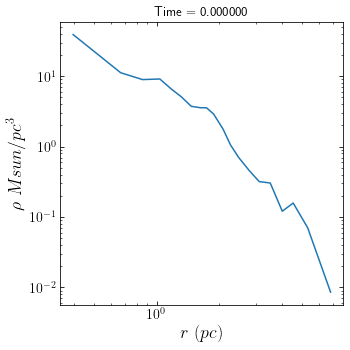

In [3]:
rprof, pprof, nprof=cts.rho_prof(cluster,plot=True)

Alternatively if one wants to know the mass in each bin:

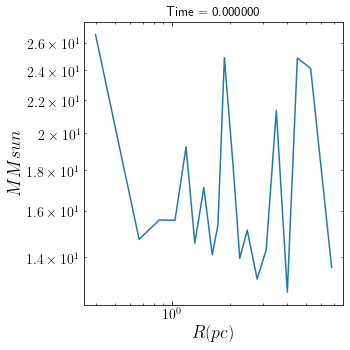

In [4]:
rprof, mprof, nprof=cts.m_prof(cluster,plot=True)

If the cumulative mass profile is of interest, set ``cumulative=True``

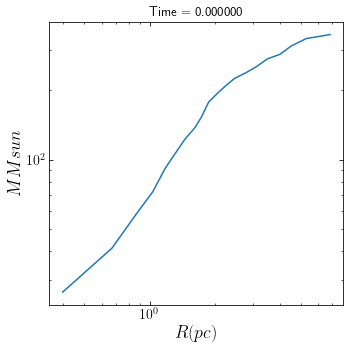

In [5]:
rprof, mprof, nprof=cts.m_prof(cluster,plot=True,cumulative=True)

Another interpretation of the mass profile is the circular velocity profile. For convenience, ``vcirc_prof`` also return the radius of maximal circular velocity and the maximum circular velocity.

2.07714811938 0.627209383198


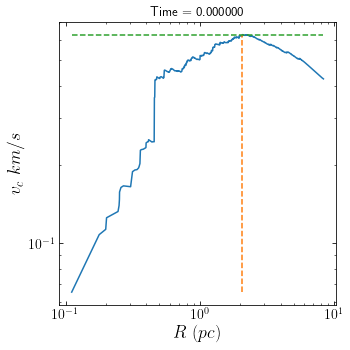

In [6]:
rprof, vcprof, rvmax, vmax = cts.vcirc_prof(cluster,plot=True,nrad=None)
print(rvmax,vmax)

With the release of Gaia DR2, it is now possible to analyze the velocity dispersion profiles of globular clusters. The ``sigv_prof`` function allows for both the total velocity dispersion profile to be measured and the velocity dispersion profile over just the radial, tangential or azimuthal direction.

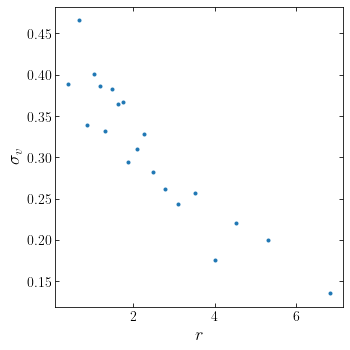

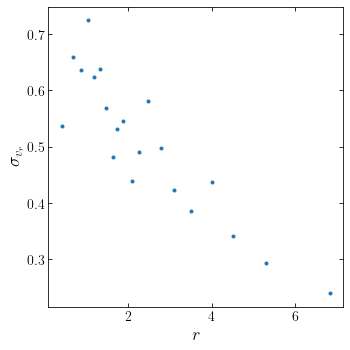

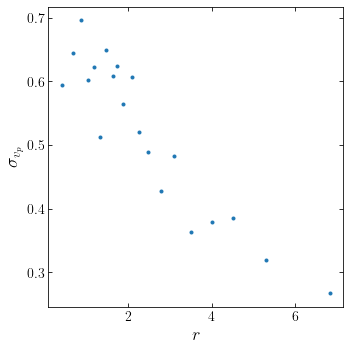

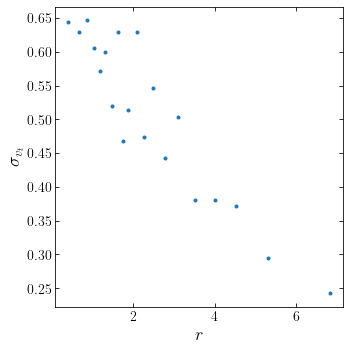

In [7]:
rprofn, sigvprof=cts.sigv_prof(cluster,plot=True)
rprofn_r, sigvprof_r=cts.sigv_prof(cluster,coord='r',plot=True)
rprofn_phi, sigvprof_phi=cts.sigv_prof(cluster,coord='phi',plot=True)
rprofn_theta, sigvprof_theta=cts.sigv_prof(cluster,coord='theta',plot=True)

The ability to measure the radial, tangential, and azimuthal velocity dispersion profiles also leads to the orbital anisotropy profile to be calculated:


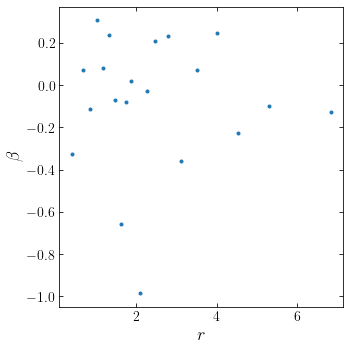

In [8]:
rprofn, betaprof=cts.beta_prof(cluster,plot=True)


Also related to kinematics is the mean velocity and mean square velocity profiles within the cluster.

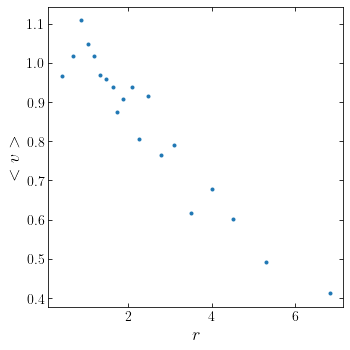

In [9]:
rprofn, vprof=cts.v_prof(cluster,plot=True)

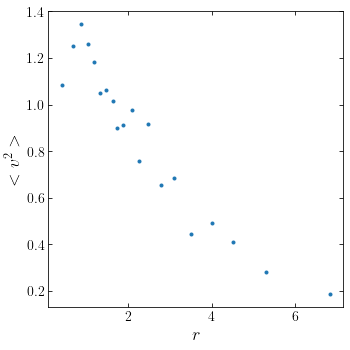

In [10]:
rprofn, vprof=cts.v2_prof(cluster,plot=True)


For an estimate of the dynamical state of cluster, one can measure the radial variation in the stellar mass function using ``alpha_prof`` (Webb, J.J. & Vesperini, E. 2016, MNRAS, 463, 2383). When using ``alpha_prof``, it is important to note:

(1) If the mass range is not specified the entire mass spectrum will be used. 

(2) When plotting, the x-axis will be ln(r) based on (Webb, J.J. & Vesperini, E. 2016, MNRAS, 463, 2383)

(3) delta_alpha is calculated to be d(alpha)/d(ln(r/rm)) as per Webb, J.J. & Vesperini, E. 2016, regardless of whether normalize is True or False. 

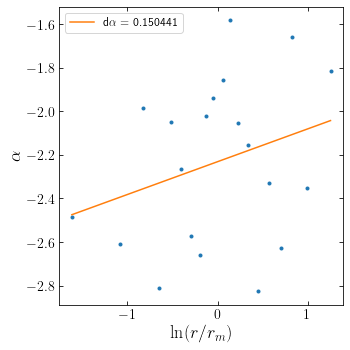

In [11]:
rprofn, aprof, dalpha, edalpha, ydalpha, eydalpha=cts.alpha_prof(cluster,mmin=0.1,mmax=0.8, plot=True, normalize=True)

Looking at how velocity dispersion changes as a function of stellar mass is also a proxy for a cluster's dynamical state, with the power-law slope eta evolving towards (but never reaching) -0.5. An eta of -0.5 corresponds to a state of complete energy equipartition. Similar to ``alpha_prof`` above, one can measure how eta changes with clustercentric distance.

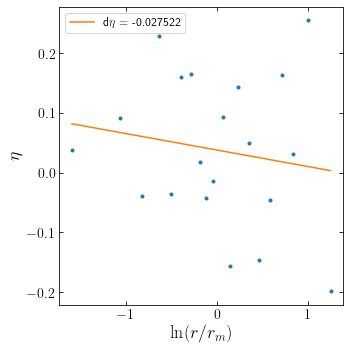

In [12]:
rprofn, eprof, deta, edeta, ydeta, eydeta=cts.eta_prof(cluster,plot=True, normalize=True)

Finally, an alternative probe for the degree of energy equipartition in a cluster, the meq profile of the cluster can be measured:

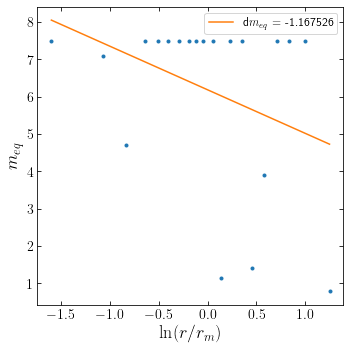

In [13]:
rprofn, meqprof, dmeq, edmeq, ydmeq, eydmeq=cts.meq_prof(cluster,plot=True, normalize=True)